In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
# %matplotlib widget

def get_file_path(isotope: str, temp: float | str, ch: int, hv: int, dir: str):
    temp_str = temp if isinstance(temp, str) else f'{int(temp)}'
    return f"../data/{dir}/{isotope}/t_{temp_str}/ch_{ch}/hv_{hv}.csv"

def load_spec(isotope: str, temp: float, ch: int, hv: int, dir: str) -> np.ndarray:
    filepath = get_file_path(isotope, temp, ch, hv, dir)
    df = pd.read_csv(filepath)
    
    df = pd.read_csv(filepath)
    exp_times = df.values[:, 0]
    total_exposure = np.sum(exp_times)
    spec_exposures = df.values[:, 4:]
    spec = np.sum(spec_exposures * np.tile(exp_times, (spec_exposures.shape[1], 1)).T, axis=0) / total_exposure
    return spec

def load_partial_specs(isotope: str, temp: float, ch: int, hv: int, dir: str) -> np.ndarray:
    filepath = get_file_path(isotope, temp, ch, hv, dir)
    df = pd.read_csv(filepath)
    total_exposure = np.sum(df.values[:, 0])
    spec_exposures = df.values[:, 4:]
    return spec_exposures

channels = np.arange(0, 256)

## HV broadening plot

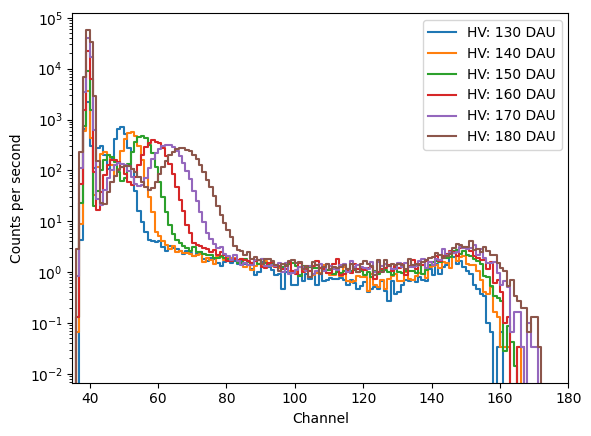

In [4]:
plt.figure()
chs = np.arange(0, 256)
for hv in range(130, 181, 10):
    spec = load_spec('am241', 20, 0, hv, 't')
    plt.step(chs, spec, label=f'HV: {hv} DAU')
plt.xlabel('Channel')
plt.ylabel('Counts per second')
plt.legend()
plt.yscale('log')
plt.xlim(35, 180)
plt.savefig('../outputs/sample_plots/hv-broadening.pdf')
plt.show()

## Temp broadening plot

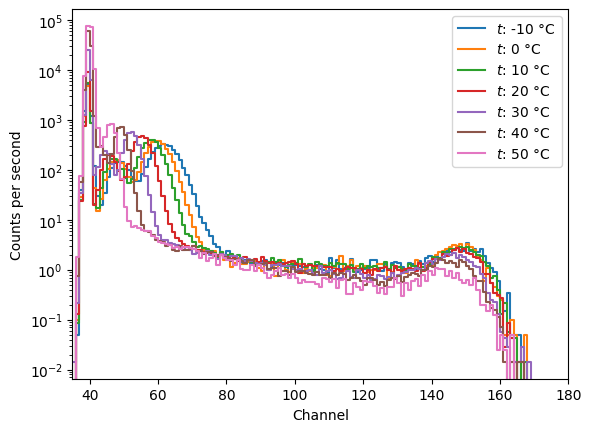

In [6]:
plt.figure()
chs = np.arange(0, 256)
hv = 150
for temp in range(-10, 51, 10):
    spec = load_spec('am241', temp, 0, hv, 't')
    plt.step(chs, spec, label=f'$t$: {temp} °C')
plt.xlabel('Channel')
plt.ylabel('Counts per second')
plt.legend()
plt.yscale('log')
plt.xlim(35, 180)
plt.savefig('../outputs/sample_plots/temp-broadening.pdf')
plt.show()